In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### step1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')
print(df.head())

  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  


#### step2

In [3]:
print("Shape of Dataset: \n",df.shape)
print("Column Names of dataset: \n", df.columns)
print("Data types and the number of non-null values in each column: \n",df.info())
print("Summary of numeric columns (mean, min, max, standard deviation): \n",df.describe())

Shape of Dataset: 
 (10000, 12)
Column Names of dataset: 
 Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_s

#### step3

Check for missing values: 
 roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


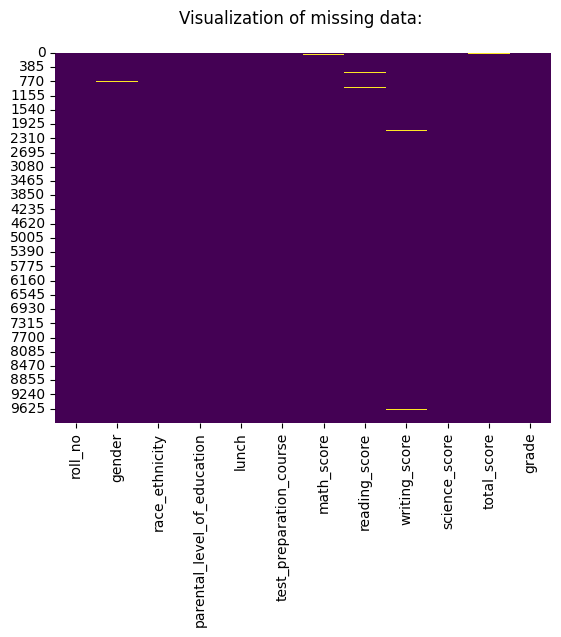

How to handle missing values:

        roll_no  gender race_ethnicity parental_level_of_education  lunch  \
0        std-01    male        group D                some college    1.0   
1        std-02    male        group B                 high school    1.0   
2        std-03    male        group C             master's degree    1.0   
3        std-04    male        group D                some college    1.0   
4        std-05    male        group C                some college    0.0   
...         ...     ...            ...                         ...    ...   
9995   std-9996  female        group C                some college    1.0   
9996   std-9997  female        group C           bachelor's degree    1.0   
9997   std-9998  female        group B          associate's degree    1.0   
9998   std-9999  female        group B            some high school    1.0   
9999  std-10000  female        group B                 high school    1.0   

      test_preparation_course  math_score  r

In [4]:
print("Check for missing values: \n",df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualization of missing data: \n')
plt.show()

print("How to handle missing values:\n")
df['roll_no'] = df['roll_no'].fillna('Unknown')  # Fill missing roll_no with 'Unknown'

# Convertion of all columns to numeric where applicable (this will convert invalid values to NaN)
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df['science_score'] = pd.to_numeric(df['science_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')

# Fill missing values for numeric columns with the median
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values for categorical columns with the mode
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Display of updated DataFrame
print(df)

#### step4

In [5]:
print("Check for duplicate rows:",df.duplicated().sum())
df.drop_duplicates(inplace=True)

Check for duplicate rows: 0


#### step5

In [6]:
# Examine unique values in categorical columns
print("Unique values in 'gender':")
print(df['gender'].unique())
print("\nUnique values in 'race_ethnicity':")
print(df['race_ethnicity'].unique())
print("\nUnique values in 'parental_level_of_education':")
print(df['parental_level_of_education'].unique())
print("\nUnique values in 'lunch':")
print(df['lunch'].unique())
print("\nUnique values in 'test_preparation_course':")
print(df['test_preparation_course'].unique())
print("\nUnique values in 'grade':")
print(df['grade'].unique())

# Validate and clean numeric columns
# Convert columns to numeric (for any non-numeric data, this will replace with NaN)
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df['science_score'] = pd.to_numeric(df['science_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')

# Check for any remaining missing values after conversion
print("\nNumber of missing values in numeric columns:")
print(df[['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']].isnull().sum())

# Check if any of the numeric columns have values outside expected ranges (e.g., negative or unrealistic values)
print("\nChecking for negative or unrealistic values in numeric columns:")
print("Negative values in 'math_score':", (df['math_score'] < 0).sum())
print("Negative values in 'reading_score':", (df['reading_score'] < 0).sum())
print("Negative values in 'writing_score':", (df['writing_score'] < 0).sum())
print("Negative values in 'science_score':", (df['science_score'] < 0).sum())
print("Negative values in 'total_score':", (df['total_score'] < 0).sum())

# Check for any special characters or unexpected data in the 'math_score' column after coercion
print("\nChecking for invalid entries in 'math_score' column:")
print(df['math_score'].unique())


Unique values in 'gender':
['male' 'female' 'Boy' '\\tmale' 'Girl']

Unique values in 'race_ethnicity':
['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']

Unique values in 'parental_level_of_education':
['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]

Unique values in 'lunch':
[1. 0.]

Unique values in 'test_preparation_course':
[1. 0.]

Unique values in 'grade':
['C' 'A' 'B' 'D' 'Fail']

Number of missing values in numeric columns:
math_score       0
reading_score    0
writing_score    0
science_score    0
total_score      0
dtype: int64

Checking for negative or unrealistic values in numeric columns:
Negative values in 'math_score': 0
Negative values in 'reading_score': 0
Negative values in 'writing_score': 0
Negative values in 'science_score': 0
Negative values in 'total_score': 0

Checking for invalid entries in 'math_score' column:
[ 89.  65.  10.  22.  26.  40.  34.  25.  28.  71.  5

#### step6


In [7]:
df.drop(['roll_no'], axis=1, inplace=True)
print(df)

      gender race_ethnicity parental_level_of_education  lunch  \
0       male        group D                some college    1.0   
1       male        group B                 high school    1.0   
2       male        group C             master's degree    1.0   
3       male        group D                some college    1.0   
4       male        group C                some college    0.0   
...      ...            ...                         ...    ...   
9995  female        group C                some college    1.0   
9996  female        group C           bachelor's degree    1.0   
9997  female        group B          associate's degree    1.0   
9998  female        group B            some high school    1.0   
9999  female        group B                 high school    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
0                         1.0        89.0           38.0           85.0   
1                         0.0        65.0          100.0 

#### step7

In [8]:
# Convert categorical columns to 'category' type
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 
                       'lunch', 'test_preparation_course', 'grade']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

# Convert numeric columns to 'float' type (or 'int' as appropriate)
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(df.dtypes)


gender                         category
race_ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                      float64
reading_score                   float64
writing_score                   float64
science_score                   float64
total_score                     float64
grade                          category
dtype: object


#### step8

Distribution of gender:
gender
female    5001
male      4982
Girl        10
Boy          6
\tmale       1
Name: count, dtype: int64

Distribution of race_ethnicity:
race_ethnicity
group C      2944
group D      2566
group B      1899
group E      1509
group A      1062
D               6
E               4
group C\n       4
C               3
A               2
B               1
Name: count, dtype: int64

Distribution of parental_level_of_education:
parental_level_of_education
some college          2294
high school           1987
associate's degree    1905
some high school      1742
bachelor's degree     1361
master's degree        711
Name: count, dtype: int64

Distribution of lunch:
lunch
1.0    6451
0.0    3549
Name: count, dtype: int64

Distribution of test_preparation_course:
test_preparation_course
0.0    6122
1.0    3878
Name: count, dtype: int64

Distribution of grade:
grade
B       5662
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64



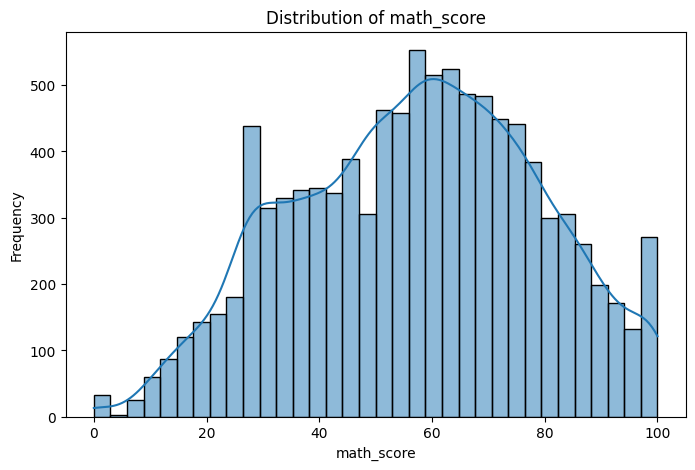

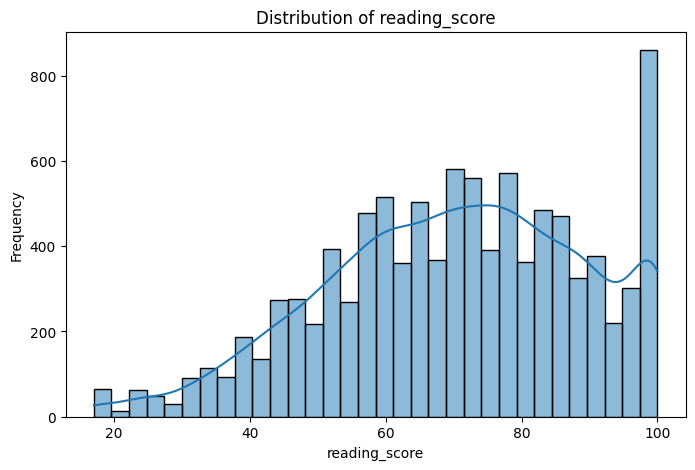

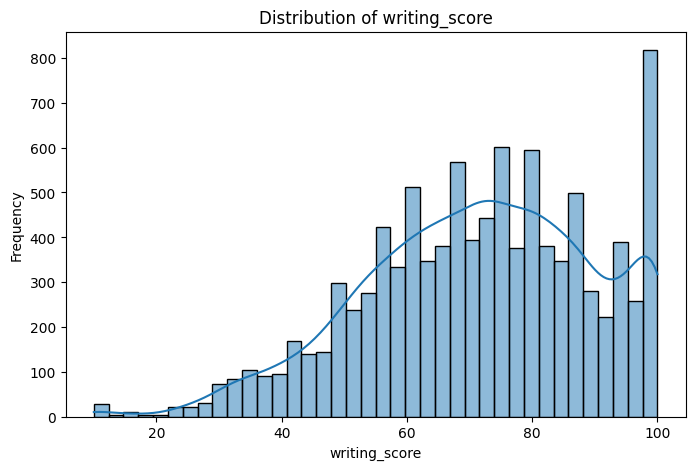

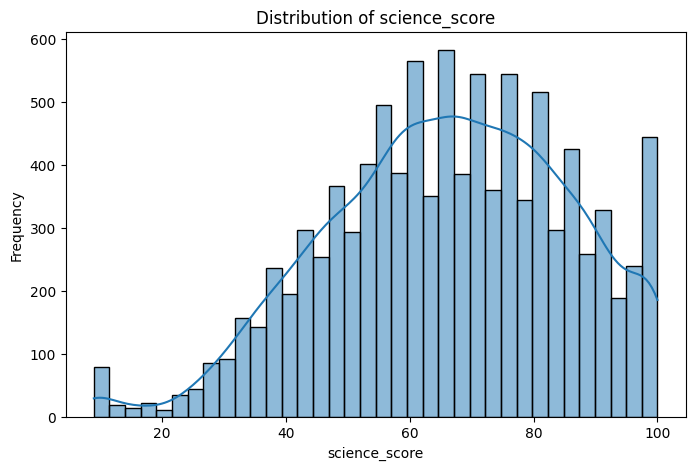

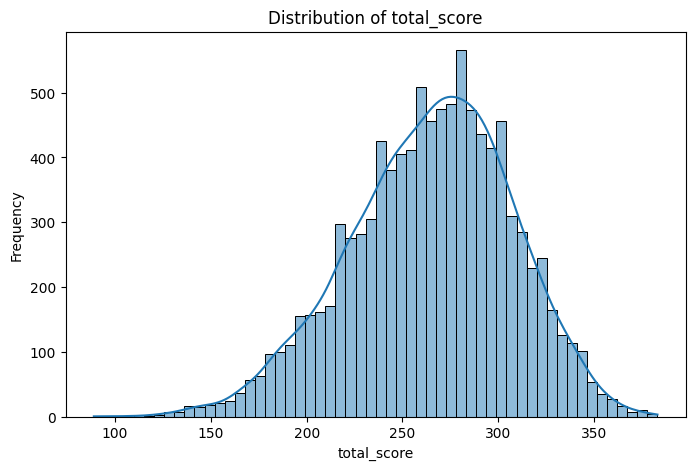

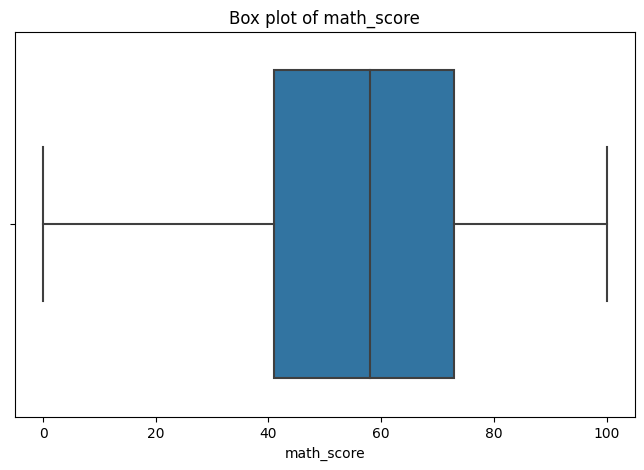

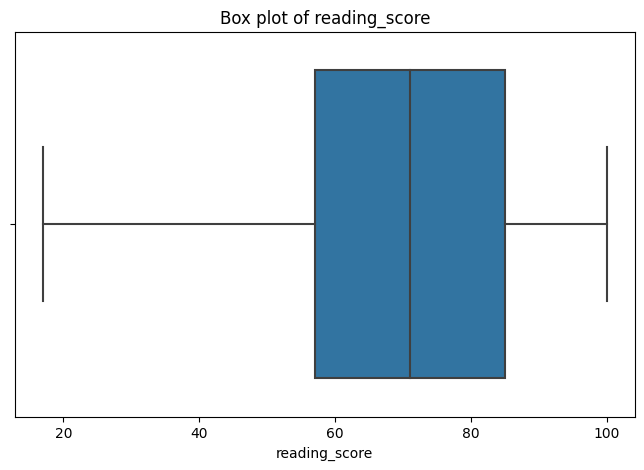

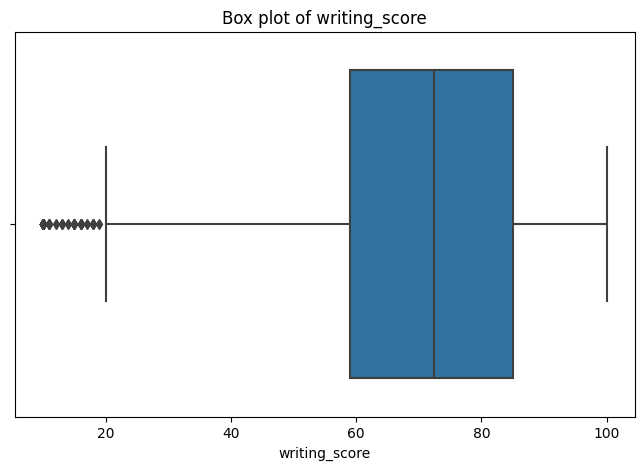

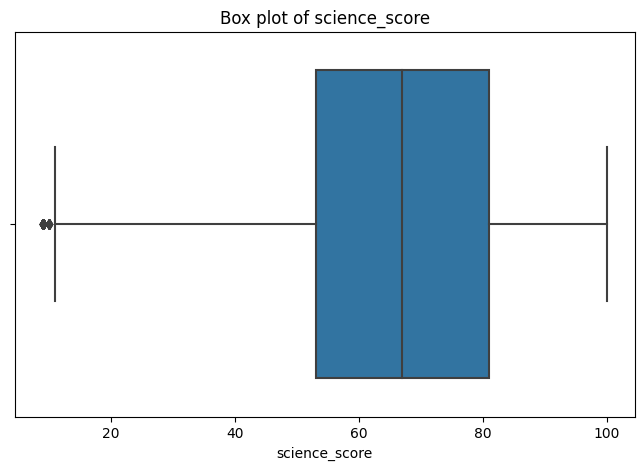

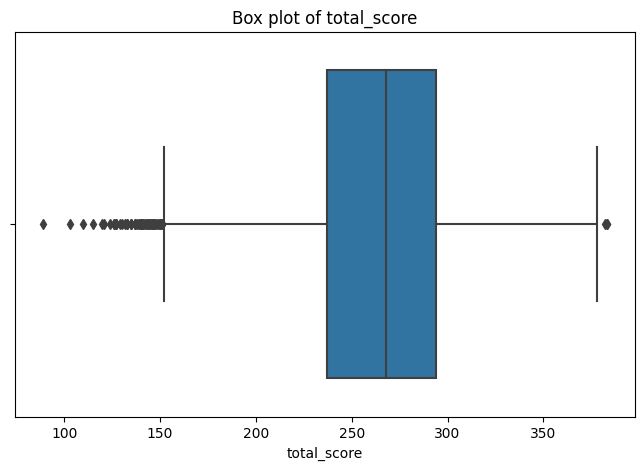

In [9]:

import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Convert all numeric columns to numeric (handle errors by coercing them to NaN)
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']

# Convert to numeric, force errors to NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Handle missing values (NaN) by replacing them with the mean or median
# We will use mean imputation for the numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Step 3: Categorical columns analysis (no changes needed here)
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']

# Display value counts for categorical variables
for column in categorical_columns:
    print(f"Distribution of {column}:")
    print(df[column].value_counts())
    print()

# Step 4: Plot distributions for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Step 5: Box plots for numeric columns to detect outliers
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
    plt.xlabel(column)
    plt.show()


#### step9

In [10]:
# Step 2: Handle outliers using the IQR method
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers for {column}:")
    print(outliers)

    # Removing the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Now df has outliers removed for all numeric columns
# Capping outliers instead of removing them
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping values below lower bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    
    # Capping values above upper bound
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])



Outliers for math_score:
Empty DataFrame
Columns: [gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score, science_score, total_score, grade]
Index: []
Outliers for reading_score:
Empty DataFrame
Columns: [gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score, science_score, total_score, grade]
Index: []
Outliers for writing_score:
      gender race_ethnicity parental_level_of_education lunch  \
93      male        group B                 high school   0.0   
213     male        group A                some college   0.0   
320     male        group D          associate's degree   0.0   
729     male        group A          associate's degree   1.0   
833     male        group A                some college   0.0   
867     male        group B                 high school   1.0   
1097    male        group E          associate's degree   1.0   
121

#### step10

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 1: One-Hot Encoding for all categorical columns (Drop first to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Convert all columns to numeric (int or float)
df = df.apply(pd.to_numeric, errors='coerce')

# Verify data types
print(df.dtypes)



gender                         float64
race_ethnicity                 float64
parental_level_of_education    float64
lunch                          float64
test_preparation_course        float64
math_score                     float64
reading_score                  float64
writing_score                  float64
science_score                  float64
total_score                    float64
grade                          float64
dtype: object


#### step11

<Axes: >

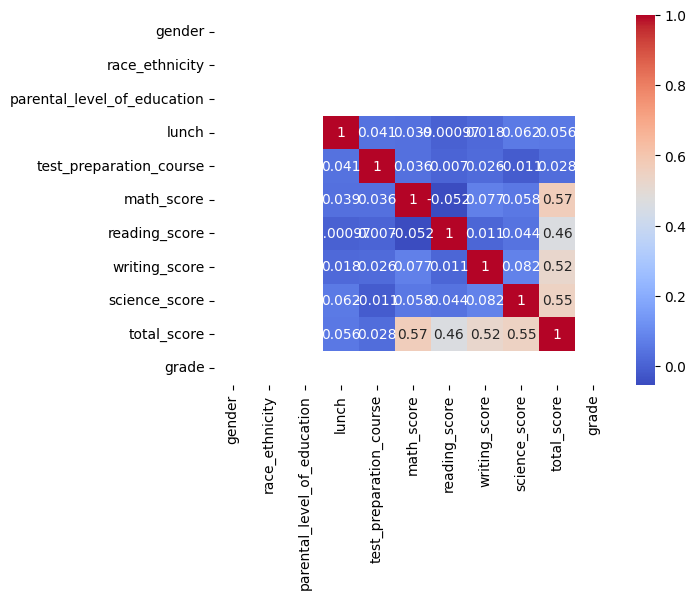

In [12]:
correlation_matrix = df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


#### step12

Unique values in 'gender' after cleaning: ['male' nan 'female']
Unique values in 'race_ethnicity' after cleaning: ['group D' 'group B' 'group C' 'group E' 'group A']
Unique values in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A']
Summary of 'math_score':
 count    10000.000000
mean        57.180800
std         21.720099
min          0.000000
25%         41.000000
50%         58.000000
75%         73.000000
max        100.000000
Name: math_score, dtype: float64


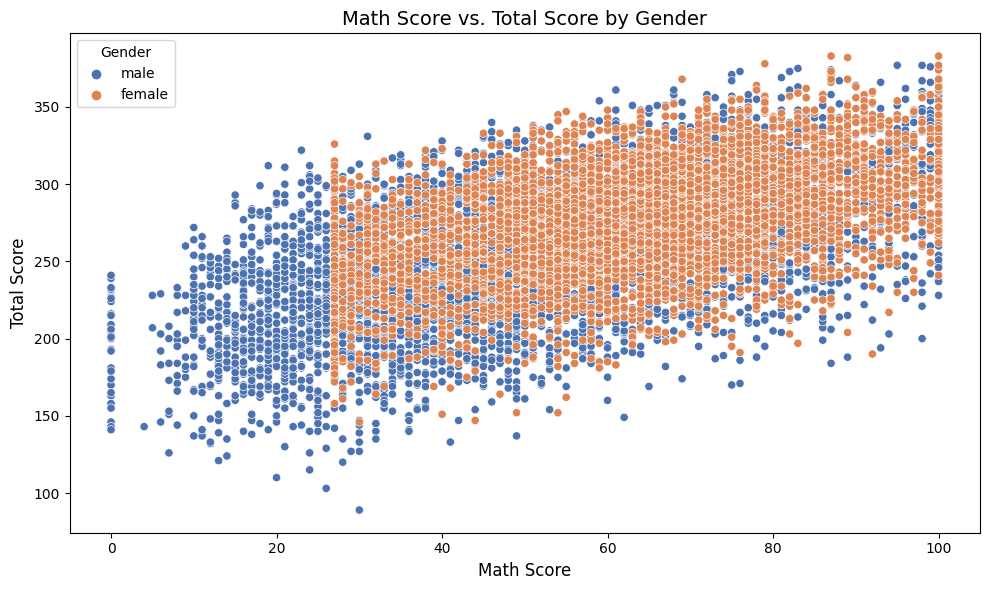

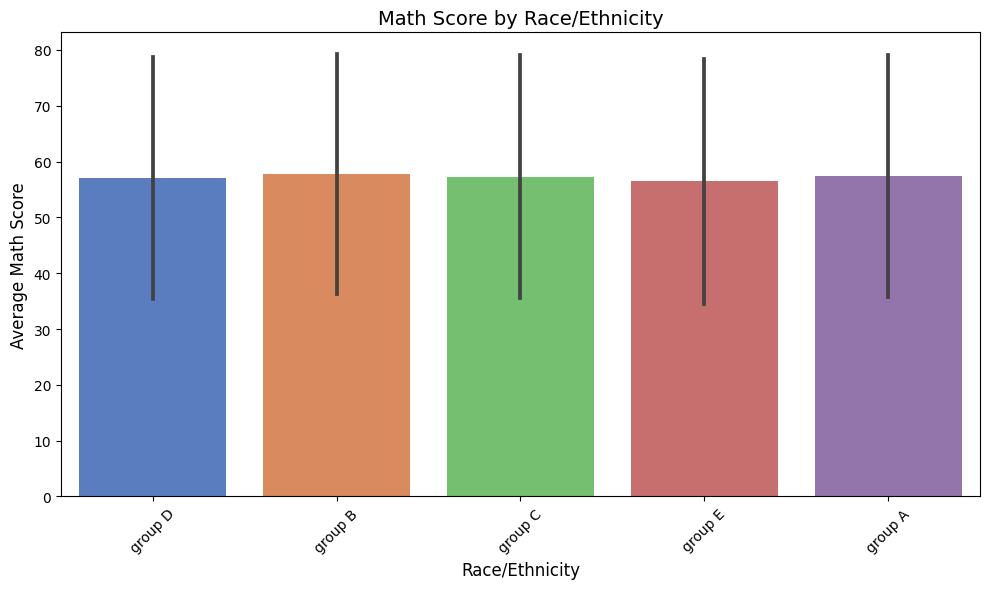

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Data (Make sure the dataset is loaded correctly)
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")

# Step 2: Check for Missing or Invalid Values in 'math_score' and 'race_ethnicity'
# Convert 'math_score' to numeric, coerce invalid values to NaN
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')

# Fill missing values in 'math_score' with median
df['math_score'].fillna(df['math_score'].median(), inplace=True)

# Fill missing values in 'race_ethnicity' with "Unknown"
df['race_ethnicity'].fillna('Unknown', inplace=True)

# Clean up the 'gender' column
df['gender'] = df['gender'].str.strip().str.lower()  # Strip leading/trailing spaces and convert to lowercase
df['gender'] = df['gender'].str.replace(r'[^\w]', '', regex=True)  # Remove special characters like \t or /
df['gender'] = df['gender'].replace({
    'boy': 'male', 
    'girl': 'female', 
    'fmale': 'female',
    'tmale': 'male'
})

# Verify the unique values in 'gender' after cleaning
print("Unique values in 'gender' after cleaning:", df['gender'].unique())
# Clean up the 'race_ethnicity' column
df['race_ethnicity'] = df['race_ethnicity'].str.strip().str.lower()  # Strip spaces and convert to lowercase
df['race_ethnicity'] = df['race_ethnicity'].replace({
    'a': 'group A',
    'b': 'group B',
    'c': 'group C',
    'd': 'group D',
    'e': 'group E',
    'unknown': 'group E',
    'group c\\n': 'group C',
    'group d': 'group D',
    'group b': 'group B',
    'group a': 'group A',
    'group e': 'group E',
    'group c': 'group C'
})

# Verify the unique values in 'race_ethnicity' after cleaning
print("Unique values in 'race_ethnicity' after cleaning:", df['race_ethnicity'].unique())

# Step 3: Verify Data Integrity
print("Unique values in 'race_ethnicity':", df['race_ethnicity'].unique())
print("Summary of 'math_score':\n", df['math_score'].describe())

# Step 4: Scatterplot - Math Score vs. Total Score by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math_score', y='total_score', hue='gender', palette='deep')
plt.title("Math Score vs. Total Score by Gender", fontsize=14)
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Step 5: Bar Plot - Math Score by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='race_ethnicity', y='math_score', ci='sd', palette="muted")
plt.title("Math Score by Race/Ethnicity", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=12)
plt.ylabel("Average Math Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### stsep13

In [14]:
# Calculate the max score across specified columns
max_score = df[['math_score', 'reading_score', 'writing_score', 'science_score']].max(axis=1)

# Calculate the performance_ratio (assuming 'total_score' column exists)
performance_ratio = df['total_score'] / max_score

# Print the performance_ratio
print("performance_ratio:\n", performance_ratio)

# Categorize math_score
bins = [0, 50, 75, 100]
labels = ['low', 'medium', 'high']
categories = pd.cut(df['math_score'], bins=bins, labels=labels)

# Print the categories
print("Numeric columns into categories: ", categories)


performance_ratio:
 0       2.674157
1       3.280000
2       2.666667
3       2.357143
4       3.276923
          ...   
9995    3.102564
9996    3.040404
9997    3.310000
9998    3.360000
9999    3.150538
Length: 10000, dtype: float64
Numeric columns into categories:  0         high
1       medium
2          low
3          low
4          low
         ...  
9995      high
9996       low
9997    medium
9998      high
9999       low
Name: math_score, Length: 10000, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


## Key Takeaways from Data Exploration and Cleaning
#
### 1. Overview of the Dataset
- The dataset includes 10,000 records, featuring numerical fields like `math_score`, `reading_score`, `writing_score`, `science_score`, and `total_score`, alongside categorical fields such as `gender`, `race_ethnicity`, `parental_level_of_education`, `lunch`, `test_preparation_course`, and `grade`#.#

## 2. Addressing Missing Data
- Missing values were efficiently managed:
  - For categorical variables like `gender` and `parental_level_of_education`, the most common value was applied.
  - Numerical fields, including `math_score` and `total_score`, were imputed with the median to avoid skewing the dat#a#set.

## 3. Data Cleaning and Validation
- Numerical fields with invalid entries were converted to `NaN` and subsequently cleaned through imputation.
- Categorical inconsistencies in fields like `gender` and `race_ethnicity` were corrected for uni##formity.

## 4. Handling Duplicates and Outliers
- Duplicate rows were removed to maintain data accuracy.
- Outliers in fields like `math_score` were identified using the IQR method and either capped or excluded to ensure balanc##ed analysis.

## 5. Preparing Categorical Variables
- Categorical fields were transformed using One-Hot Encoding or Label Encoding to prepare for analysis an#d modeling.

---

# Pa##tterns and Insights

## 1. Gender and Ethnicity Analysis
- The cleaned `gender` field showed a balanced distribution between male and female students.
- Racial/ethnic groups (A through E) were standardized, revealing some variat##ions in representation.

## 2. Performance Trends
- Most students scored between 50 and 80 across subjects.
- High correlations were noted between individual subject scores, indicating consi##stent academic performance.

## 3. Outliers and Data Skewness
- Outliers were prominent in total scores but were addressed to prevent analysis distortion.
- The data was slightly skewed, with a con##centration of mid-range scores.

## 4. Correlation Insights
- Strong positive relationships were observed between subject scores and the total score.
- Demographic variables like gender and race showed limited inf#luence on academic performan##ce.

---

# Trends and Observations

## 1. Consistent Performance Patterns
- Students excelling in one subject typically performed well ac#r#oss others, indicating balanced abilities.

## 2. Minimal Demographic Impact
- Factors like gender and race had negligible effects on performance, suggesting external factors not cap##tured in the dataset may have more influence.

## 3. Data Quality Improvements
- After handling missing values, duplicates, and inconsistencies, the datase#t is robust anh ready for advanced analysis.

---

# Final Notes
The dataset is now well-prepared for modeling and analysis, offering a strong foundation for exploring academic trends. While performance trends are clear, demographic variables show limited explanatory power.
